In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("dark") 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('dark_background')
import matplotlib.dates as mdates
import plotly.graph_objects as go
import mplfinance as mpf
import yfinance as yf

In [2]:
# import ccxt
# import pandas as pd
# from datetime import datetime

# # --- Inisialisasi bursa ---
# exchange = ccxt.binance({
#     'enableRateLimit': True
# })
# symbol = 'BTC/USDT'
# timeframe = '1d'

# # Rentang waktu
# start_date = '2020-01-01T00:00:00Z'
# end_date = '2025-10-17T00:00:00Z'

# since = exchange.parse8601(start_date)
# end_timestamp = exchange.parse8601(end_date)

# # List penampung semua data
# all_ohlcv = []

# print(f"Mulai download {symbol} dari {start_date} sampai {end_date}...\n")

# while True:
#     try:
#         ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=since, limit=1000)
        
#         if not ohlcv:
#             print("Tidak ada data baru, selesai.")
#             break

#         all_ohlcv.extend(ohlcv)
#         last_timestamp = ohlcv[-1][0]

#         if last_timestamp >= end_timestamp:
#             print("Sudah mencapai tanggal akhir, berhenti.")
#             break

#         since = last_timestamp + 1
#         print(f"✅ Ambil {len(ohlcv)} baris, lanjut dari {pd.to_datetime(since, unit='ms')}")

#     except Exception as e:
#         print(f"⚠️ Terjadi error: {e}")
#         break

# # Konversi ke DataFrame
# df = pd.DataFrame(all_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# if not df.empty:
#     # --- PERUBAHAN KUNCI DI SINI ---
#     # Konversi timestamp ke datetime dan LANGSUNG JADIKAN TZ-AWARE (UTC)
#     df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms').dt.tz_localize('UTC')
#     # ---------------------------------
    
#     df.set_index('timestamp', inplace=True)

#     # Filter supaya gak lewat tanggal akhir (sekarang akan berhasil)
#     df = df[df.index <= pd.to_datetime(end_date)]

#     # Simpan ke CSV
#     df.to_csv('17 oktober.csv', index=True, index_label='timestamp')

#     print(f"\n✅ Download selesai. Total data: {len(df)} baris")
#     print(f"📁 Disimpan ke: bitcoin terbaru.csv")
# else:
#     print("❌ Tidak ada data yang berhasil diunduh.")

In [3]:
# --- Load BTC ---
df = pd.read_csv('17 oktober.csv')
df['volume'] = df['volume'].round(2)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df = df.sort_index()

df.tail()

,open,high,low,close,volume
timestamp,,,,,
2025-10-13,114958.81,115963.81,113616.50,115166.00,22557.24
2025-10-14,115166.00,115409.96,109866.00,113028.14,31870.33
2025-10-15,113028.13,113612.35,110164.00,110763.28,22986.49
2025-10-16,110763.28,111982.45,107427.00,108194.28,29857.17
2025-10-17,108194.27,109240.00,103528.23,106660.99,35601.25


In [4]:
events = [
    # --- 2020 ---
    {'date': '2020-03-11', 'category': 'Macro_Economics', 'event': 'WHO declares COVID-19 pandemic'},
    {'date': '2020-03-12', 'category': 'Macro_Economics', 'event': 'Black Thursday crash: Bitcoin drops over 40% in one day'},
    {'date': '2020-05-11', 'category': 'Bitcoin_Specific', 'event': 'Bitcoin Halving #3'},
    {'date': '2020-07-22', 'category': 'Regulation', 'event': 'US OCC allows banks to hold crypto'},
    {'date': '2020-08-11', 'category': 'Industry_Event', 'event': 'MicroStrategy first buys Bitcoin'},
    {'date': '2020-10-21', 'category': 'Industry_Event', 'event': 'PayPal supports crypto'},
    {'date': '2020-11-03', 'category': 'Politics', 'event': 'US Presidential Election (Biden vs. Trump)'},

    # --- 2021 ---
    {'date': '2021-01-06', 'category': 'Politics', 'event': 'US Capitol Riot'},
    {'date': '2021-01-29', 'category': 'Industry_Event', 'event': 'Elon Musk adds #Bitcoin to Twitter bio'},
    {'date': '2021-02-08', 'category': 'Industry_Event', 'event': 'Tesla buys $1.5B in Bitcoin'},
    {'date': '2021-04-14', 'category': 'Industry_Event', 'event': 'Coinbase IPO'},
    {'date': '2021-05-12', 'category': 'Industry_Event', 'event': 'Elon Musk says Tesla will stop accepting Bitcoin due to energy concerns'},
    {'date': '2021-06-01', 'category': 'Regulation', 'event': 'China cracks down on crypto mining'},
    {'date': '2021-09-07', 'category': 'Regulation', 'event': 'El Salvador adopts Bitcoin as legal tender'},
    {'date': '2021-11-10', 'category': 'Bitcoin_Specific', 'event': 'Bitcoin reaches new ATH around $69,000'},
    {'date': '2021-11-15', 'category': 'Bitcoin_Specific', 'event': 'Taproot upgrade activated on Bitcoin network'},

    # --- 2022 ---
    {'date': '2022-02-24', 'category': 'Geopolitics', 'event': 'Russia invades Ukraine'},
    {'date': '2022-03-16', 'category': 'Macro_Economics', 'event': 'US Fed begins aggressive rate hikes'},
    {'date': '2022-05-09', 'category': 'Industry_Event', 'event': 'Terra/LUNA ecosystem collapse begins'},
    {'date': '2022-06-13', 'category': 'Industry_Event', 'event': 'Celsius Network halts withdrawals'},
    {'date': '2022-07-06', 'category': 'Industry_Event', 'event': 'Voyager Digital files for bankruptcy'},
    {'date': '2022-11-08', 'category': 'Industry_Event', 'event': 'FTX exchange scandal explodes'},
    {'date': '2022-12-12', 'category': 'Regulation', 'event': 'Sam Bankman-Fried arrested in the Bahamas'},

    # --- 2023 ---
    {'date': '2023-03-10', 'category': 'Macro_Economics', 'event': 'Silicon Valley Bank (SVB) collapses'},
    {'date': '2023-03-12', 'category': 'Macro_Economics', 'event': 'US Government guarantees SVB deposits, market relief rally'},
    {'date': '2023-06-15', 'category': 'Industry_Event', 'event': 'BlackRock files for Bitcoin ETF'},
    {'date': '2023-08-29', 'category': 'Regulation', 'event': 'Grayscale wins lawsuit vs SEC on Bitcoin ETF rejection'},
    {'date': '2023-10-07', 'category': 'Geopolitics', 'event': 'Israel-Hamas conflict escalates'},
    {'date': '2023-12-01', 'category': 'Industry_Event', 'event': 'Bitcoin surpasses $40,000 for first time since 2022'},

    # --- 2024 ---
    {'date': '2024-01-10', 'category': 'Regulation', 'event': 'SEC approves Spot Bitcoin ETFs in the US'},
    {'date': '2024-02-29', 'category': 'Industry_Event', 'event': 'Bitcoin ETF inflows surpass $10B'},
    {'date': '2024-03-14', 'category': 'Bitcoin_Specific', 'event': 'Bitcoin breaks new ATH above $73,000'},
    {'date': '2024-04-19', 'category': 'Bitcoin_Specific', 'event': 'Bitcoin Halving #4'},
    {'date': '2024-07-15', 'category': 'Macro_Economics', 'event': 'US inflation data drops below 3%, boosting risk assets'},
    {'date': '2024-11-05', 'category': 'Politics', 'event': 'US Presidential Election'},

    # --- 2025 ---
    {'date': '2025-01-20', 'category': 'Politics', 'event': 'US Presidential Inauguration'},
    {'date': '2025-04-10', 'category': 'Macro_Economics', 'event': 'Fed begins rate cuts after years of tightening'},
    {'date': '2025-07-01', 'category': 'Industry_Event', 'event': 'Major US banks integrate stablecoin settlement for Bitcoin trading'}
]


# 2. Buat kolom-kolom baru di DataFrame dan inisialisasi dengan 0
kategori_unik = sorted(list(set(event['category'] for event in events)))
for kategori in kategori_unik:
    df[kategori] = 0
print(f"Kolom baru yang ditambahkan: {kategori_unik}")

# 3. Loop melalui setiap event dan tandai tanggal yang sesuai dengan nilai 1
for event in events:
    tanggal_event = event['date']
    kategori_event = event['category']
    
    # Cek apakah tanggal ada di index DataFrame untuk menghindari error
    if tanggal_event in df.index:
        df.loc[tanggal_event, kategori_event] = 1
        print(f"-> Event '{event['event']}' ditandai pada {tanggal_event} di kolom '{kategori_event}'")
    else:
        print(f"-> Peringatan: Tanggal {tanggal_event} tidak ditemukan di DataFrame. Event '{event['event']}' dilewati.")

# 4. Verifikasi hasilnya
print("\n--- Verifikasi ---")
print("Menampilkan beberapa baris data yang memiliki event 'Geopolitics':")
print(df[df['Geopolitics'] == 1][kategori_unik])

print("\nMenampilkan beberapa baris data yang memiliki event 'Industry_Event':")
print(df[df['Industry_Event'] == 1][kategori_unik])

Kolom baru yang ditambahkan: ['Bitcoin_Specific', 'Geopolitics', 'Industry_Event', 'Macro_Economics', 'Politics', 'Regulation']
-> Event 'WHO declares COVID-19 pandemic' ditandai pada 2020-03-11 di kolom 'Macro_Economics'
-> Event 'Black Thursday crash: Bitcoin drops over 40% in one day' ditandai pada 2020-03-12 di kolom 'Macro_Economics'
-> Event 'Bitcoin Halving #3' ditandai pada 2020-05-11 di kolom 'Bitcoin_Specific'
-> Event 'US OCC allows banks to hold crypto' ditandai pada 2020-07-22 di kolom 'Regulation'
-> Event 'MicroStrategy first buys Bitcoin' ditandai pada 2020-08-11 di kolom 'Industry_Event'
-> Event 'PayPal supports crypto' ditandai pada 2020-10-21 di kolom 'Industry_Event'
-> Event 'US Presidential Election (Biden vs. Trump)' ditandai pada 2020-11-03 di kolom 'Politics'
-> Event 'US Capitol Riot' ditandai pada 2021-01-06 di kolom 'Politics'
-> Event 'Elon Musk adds #Bitcoin to Twitter bio' ditandai pada 2021-01-29 di kolom 'Industry_Event'
-> Event 'Tesla buys $1.5B in B

In [5]:
df['MA50'] = df['close'].rolling(window=50).mean().round(2)
df['MA200'] = df['close'].rolling(window=200).mean().round(2)
df['Daily Return'] = (df['close'].pct_change() * 100).round(2)
df['return'] = df['close'].pct_change()

In [6]:
df.reset_index(inplace=True)
df.to_csv('bitcoin_17 oktober.csv', index=False)

In [7]:
df = pd.read_csv('bitcoin_17 oktober.csv')

df.tail()

,timestamp,open,high,low,close,volume,Bitcoin_Specific,Geopolitics,Industry_Event,Macro_Economics,Politics,Regulation,MA50,MA200,Daily Return,return
2112,2025-10-13,114958.81,115963.81,113616.50,115166.00,22557.24,0,0,0,0,0,0,114340.25,106964.30,0.18,0.001802
2113,2025-10-14,115166.00,115409.96,109866.00,113028.14,31870.33,0,0,0,0,0,0,114398.57,107107.32,-1.86,-0.018563
2114,2025-10-15,113028.13,113612.35,110164.00,110763.28,22986.49,0,0,0,0,0,0,114378.57,107247.89,-2.00,-0.020038
2115,2025-10-16,110763.28,111982.45,107427.00,108194.28,29857.17,0,0,0,0,0,0,114317.22,107376.91,-2.32,-0.023194
2116,2025-10-17,108194.27,109240.00,103528.23,106660.99,35601.25,0,0,0,0,0,0,114199.10,107497.47,-1.42,-0.014172


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         2117 non-null   object 
 1   open              2117 non-null   float64
 2   high              2117 non-null   float64
 3   low               2117 non-null   float64
 4   close             2117 non-null   float64
 5   volume            2117 non-null   float64
 6   Bitcoin_Specific  2117 non-null   int64  
 7   Geopolitics       2117 non-null   int64  
 8   Industry_Event    2117 non-null   int64  
 9   Macro_Economics   2117 non-null   int64  
 10  Politics          2117 non-null   int64  
 11  Regulation        2117 non-null   int64  
 12  MA50              2068 non-null   float64
 13  MA200             1918 non-null   float64
 14  Daily Return      2116 non-null   float64
 15  return            2116 non-null   float64
dtypes: float64(9), int64(6), object(1)
memory 

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Exploratory Data Analysis (EDA)

In [10]:
df[['close', 'volume', 'Daily Return', 'return']].describe()

,close,volume,Daily Return,return
count,2117.000000,2117.000000,2116.000000,2116.000000
mean,45457.949164,75770.524606,0.181895,0.001820
std,30530.120900,87950.709312,3.267068,0.032671
min,4800.000000,3282.170000,-39.500000,-0.395048
25%,21360.110000,27832.850000,-1.230000,-0.012328
50%,38420.810000,46777.820000,0.065000,0.000665
75%,62387.900000,80948.210000,1.532500,0.015357
max,124658.540000,760705.360000,19.540000,0.195361


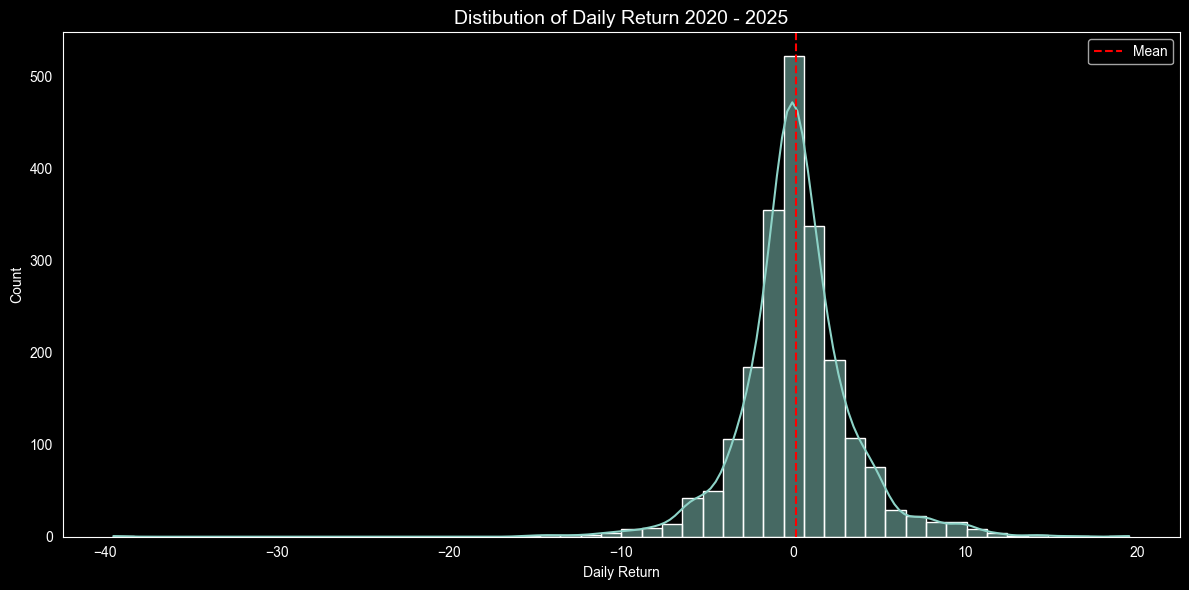

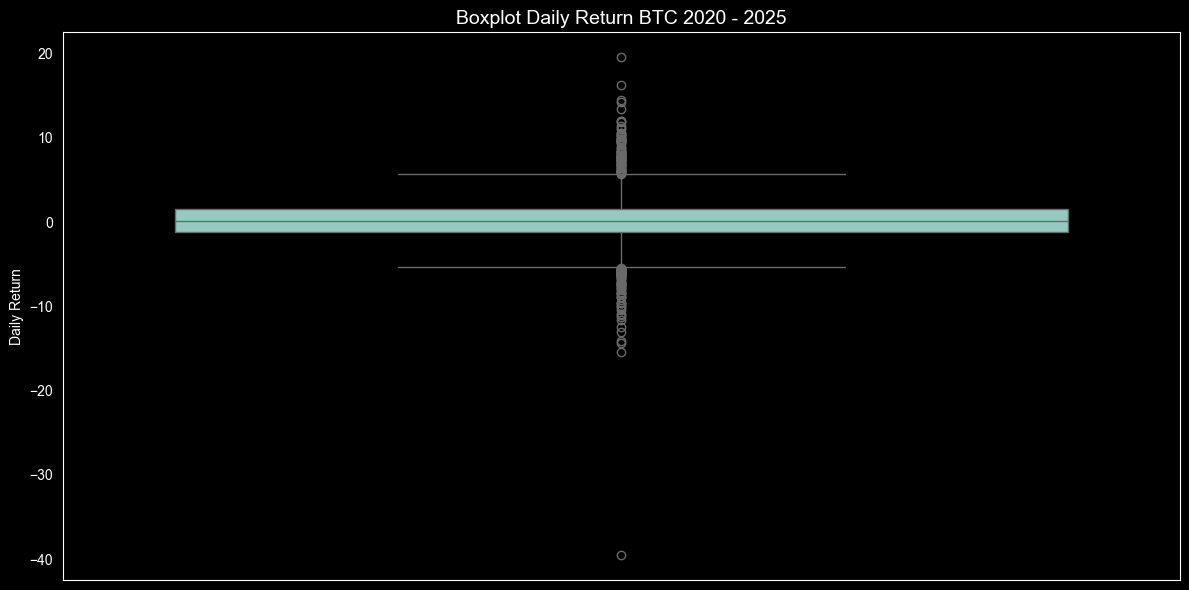

Skewness: -0.59
Kurtosis: 13.08


In [11]:
daily_return_skew = df['Daily Return'].skew()
daily_return_kurtosis = df['Daily Return'].kurt()

plt.figure(figsize=(12,6))

sns.histplot(df['Daily Return'], bins=50, kde=True)
plt.axvline(df['Daily Return'].mean(), color='red', linestyle='--', label='Mean')
plt.title('Distibution of Daily Return 2020 - 2025', fontsize = 14)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))

sns.boxplot(df['Daily Return'])
plt.title('Boxplot Daily Return BTC 2020 - 2025', fontsize = 14)
plt.grid(False)
plt.tight_layout()
plt.show()

print(f'Skewness: {daily_return_skew:.2f}')
print(f'Kurtosis: {daily_return_kurtosis:.2f}')

### Kesimpulan dari Skewness dan Kurtosis Return Bitcoin:

1. **Distribusi tidak simetris (Skewness = -0.59)**

   * Nilai negatif menunjukkan distribusi miring ke kiri.
   * Artinya, return negatif ekstrem (penurunan tajam) lebih sering terjadi daripada return positif ekstrem.
   * Secara praktis, pasar Bitcoin cenderung jatuh lebih cepat daripada naik — investor menghadapi risiko rugi yang lebih besar saat terjadi koreksi.

2. **Distribusi sangat runcing (Kurtosis = 13.08)**

   * Nilai jauh di atas 3 (normal) menunjukkan distribusi memiliki “ekor gemuk” (*fat tails*).
   * Ini berarti fluktuasi harga ekstrem — baik kenaikan maupun penurunan besar — terjadi jauh lebih sering daripada yang diprediksi oleh distribusi normal.
   * Dengan kata lain, volatilitas Bitcoin sangat tinggi dan sering muncul *shock* besar di pasar.

3. **Makna keseluruhan:**

   * Return Bitcoin **tidak terdistribusi normal**, melainkan **asimetri dan heavy-tailed**.
   * Risiko ekstrem (terutama ke arah negatif) **lebih besar daripada potensi keuntungan ekstrem**.
   * Analisis atau pengukuran risiko tidak bisa memakai asumsi distribusi normal (seperti metode VaR standar).
   * Perilaku pasar ini menunjukkan bahwa Bitcoin masih sangat dipengaruhi oleh kejadian ekstrem dan sentimen global — bukan pergerakan harga yang stabil.

---

Jadi, secara ringkas:

> Bitcoin menunjukkan pola return yang tidak stabil, condong ke arah penurunan tajam, dan memiliki potensi kejadian ekstrem yang jauh lebih sering daripada pasar normal.


           close    volume    return
close   1.000000 -0.397208  0.004035
volume -0.397208  1.000000 -0.000586
return  0.004035 -0.000586  1.000000


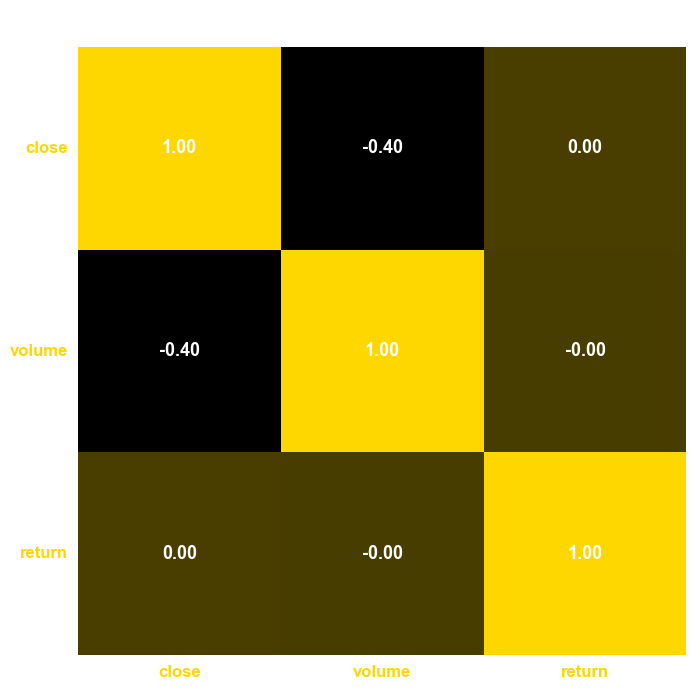

In [12]:
corr = df[['close', 'volume', 'return']].corr()
print(corr)

cmap = sns.color_palette(["#000000", "#FFD700"])

plt.figure(figsize=(9, 7))
ax = sns.heatmap(
    corr,
    annot=True,
    cmap=sns.blend_palette(["#000000", "#FFD700"], as_cmap=True),
    fmt=".2f",
    cbar=False,
    annot_kws={'size': 13, 'weight': 'bold', 'color': 'white'},
    linewidths=0,
    linecolor='none',
    square=True
)

ax.grid(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.tick_params(left=False, bottom=False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_facecolor('none')
plt.gcf().patch.set_alpha(0.0)

plt.title(
    'Correlation Between Close, Volume, and Return',
    fontsize=16,
    pad=15,
    weight='bold',
    color='white'
)
plt.xticks(color='#FFD700', fontsize=12, weight='bold')
plt.yticks(color='#FFD700', fontsize=12, weight='bold', rotation=0)

plt.tight_layout()
plt.show()


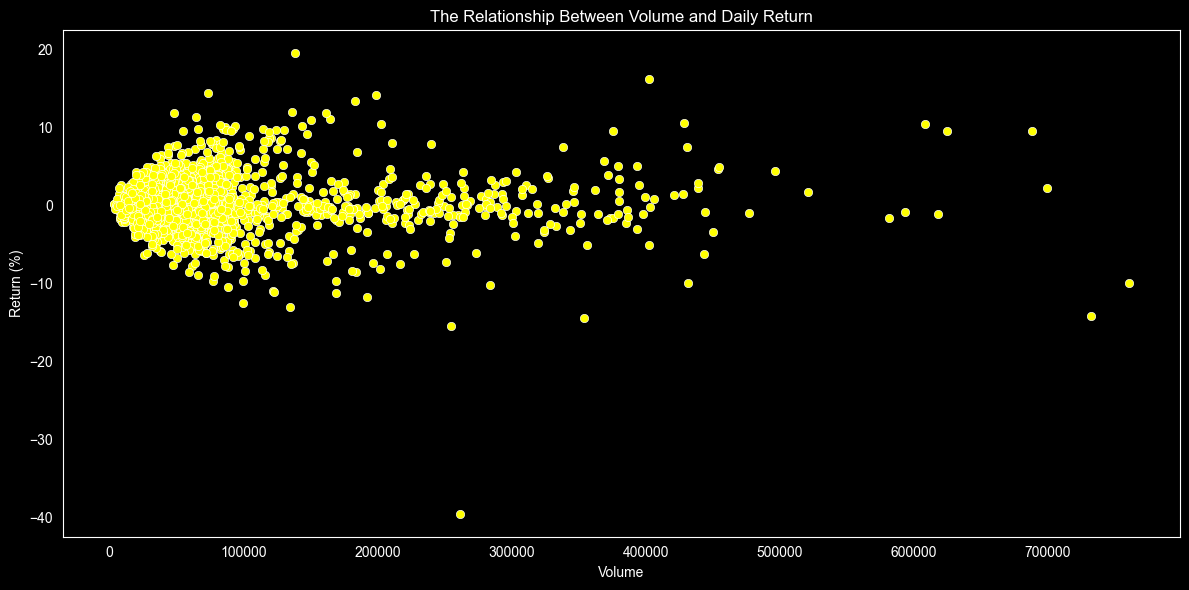

In [13]:
plt.figure(figsize=(12,6))

sns.scatterplot(data = df,
                x = 'volume',
                y = 'Daily Return',
                color = 'yellow')

plt.title('The Relationship Between Volume and Daily Return')
plt.xlabel('Volume')
plt.ylabel('Return (%)')
plt.grid(False)

plt.tight_layout()
plt.show()

In [14]:
df['year'] = df['timestamp'].dt.year
summary = df.groupby('year', as_index= False)['close'].agg(['mean', 'std', 'max', 'min']).round(2)
summary['year'] = summary['year'].astype(int)

summary.to_csv('summary.csv', index = False)

summary


,year,mean,std,max,min
0,2020,11110.55,4309.47,28923.63,4800.00
1,2021,47400.00,9770.99,67525.83,29331.69
2,2022,28185.22,10188.51,47722.65,15781.29
3,2023,28849.59,5901.64,44170.99,16616.75
4,2024,65963.59,14679.33,106133.74,39568.02
5,2025,103126.33,11849.84,124658.54,76322.42


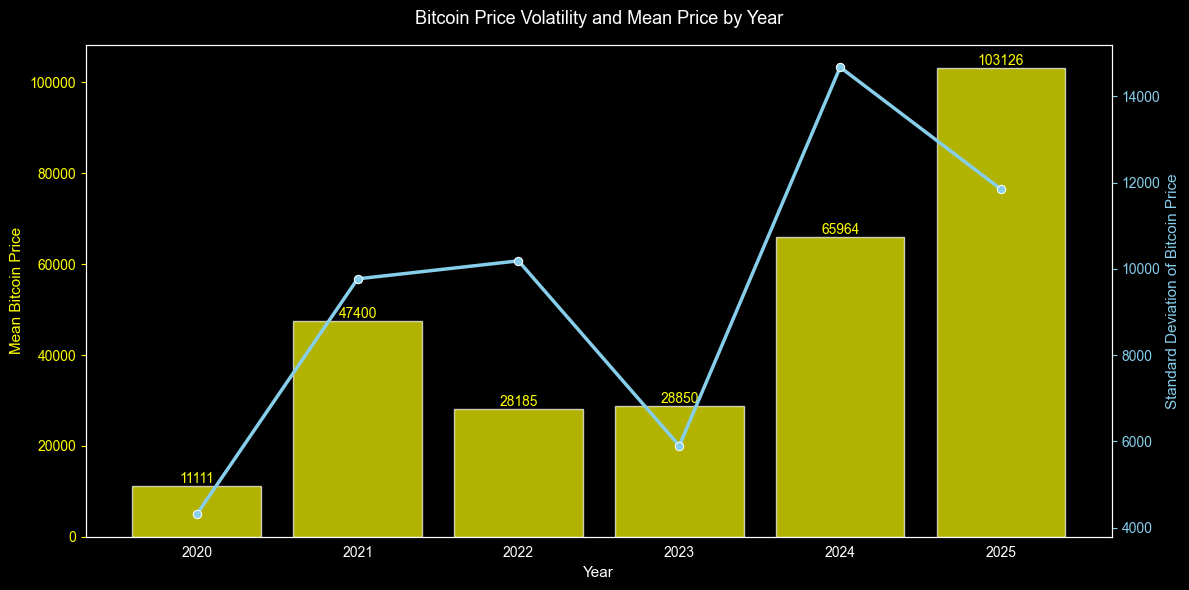

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 6))

bars = ax1.bar(
    summary["year"],
    summary["mean"],
    color="yellow",
    alpha=0.7,
    width=0.8
)
ax1.set_xlabel("Year", fontsize=11)
ax1.set_ylabel("Mean Bitcoin Price", color="yellow", fontsize=11)
ax1.tick_params(axis="y", colors="yellow")

# Label di atas setiap bar
ax1.bar_label(bars, fmt="%.0f", label_type="edge", color="yellow", fontsize=10)

# Line chart untuk standard deviation
ax2 = ax1.twinx()
sns.lineplot(
    data=summary,
    x="year",
    y="std",
    color="skyblue",
    marker="o",
    linewidth=2.5,
    ax=ax2
)
ax2.set_ylabel("Standard Deviation of Bitcoin Price", color="skyblue", fontsize=11)
ax2.tick_params(axis="y", colors="skyblue")

ax1.grid(False)
ax2.grid(False)

ax1.set_title("Bitcoin Price Volatility and Mean Price by Year", fontsize=13, pad=15)
plt.tight_layout()
plt.show()


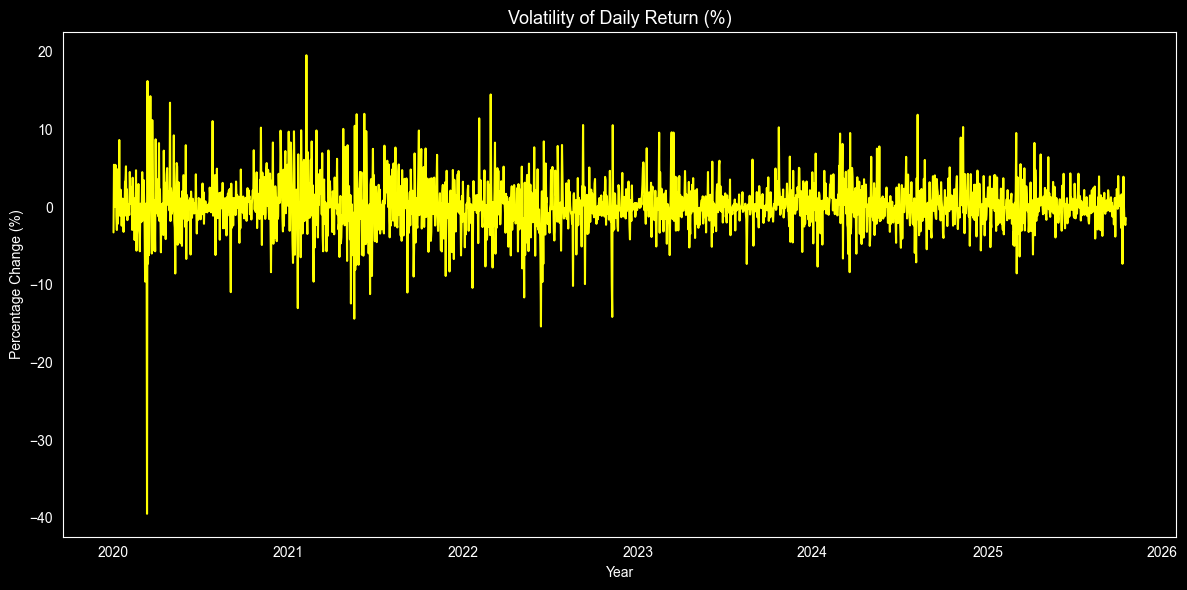

In [16]:
plt.figure(figsize=(12,6))

sns.lineplot(data = df,
             x = 'timestamp',
             y = 'Daily Return',
             color = 'yellow')

plt.title('Volatility of Daily Return (%)', fontsize = 13)
plt.ylabel('Percentage Change (%)')
plt.xlabel('Year')
plt.grid(False)

plt.tight_layout()
plt.show()

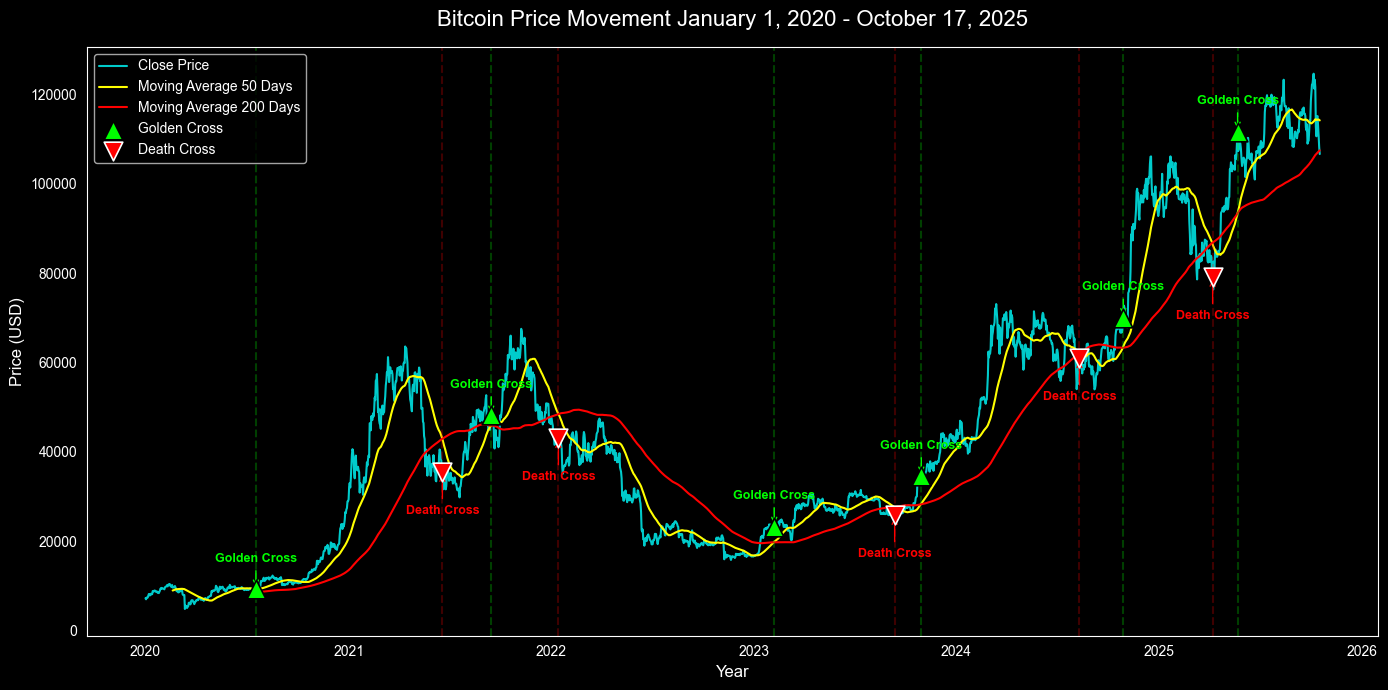

In [17]:
df_chart = df.copy()

# --- DETEKSI GOLDEN CROSS & DEATH CROSS ---
df_chart['Signal'] = 0
df_chart.loc[df_chart['MA50'] > df_chart['MA200'], 'Signal'] = 1

df_chart['Cross'] = df_chart['Signal'].diff()

golden_cross = df_chart[df_chart['Cross'] == 1]
death_cross = df_chart[df_chart['Cross'] == -1]

plt.figure(figsize=(14, 7))
plt.plot(df_chart['timestamp'], df_chart['close'], label='Close Price', color='cyan', alpha=0.8)
plt.plot(df_chart['timestamp'], df_chart['MA50'], label='Moving Average 50 Days', color='yellow', linewidth=1.5)
plt.plot(df_chart['timestamp'], df_chart['MA200'], label='Moving Average 200 Days', color='red', linewidth=1.5)

plt.scatter(
    golden_cross['timestamp'], golden_cross['close'],
    label='Golden Cross', color='lime', marker='^', s=180,
    edgecolor='black', linewidth=1.2, zorder=5
)
plt.scatter(
    death_cross['timestamp'], death_cross['close'],
    label='Death Cross', color='red', marker='v', s=180,
    edgecolor='white', linewidth=1.2, zorder=5
)

for x in golden_cross['timestamp']:
    plt.axvline(x=x, color='lime', linestyle='--', alpha=0.25)
for x in death_cross['timestamp']:
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.25)

for _, row in golden_cross.iterrows():
    plt.annotate(
        'Golden Cross',
        xy=(row['timestamp'], row['close']),
        xytext=(0, 20),
        textcoords='offset points',
        color='lime',
        fontsize=9,
        fontweight='bold',
        ha='center',
        arrowprops=dict(arrowstyle='->', color='lime', lw=1)
    )
for _, row in death_cross.iterrows():
    plt.annotate(
        'Death Cross',
        xy=(row['timestamp'], row['close']),
        xytext=(0, -30),
        textcoords='offset points',
        color='red',
        fontsize=9,
        fontweight='bold',
        ha='center',
        arrowprops=dict(arrowstyle='->', color='red', lw=1)
    )

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Bitcoin Price Movement January 1, 2020 - October 17, 2025', fontsize=16, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(False)

plt.tight_layout()
plt.show()


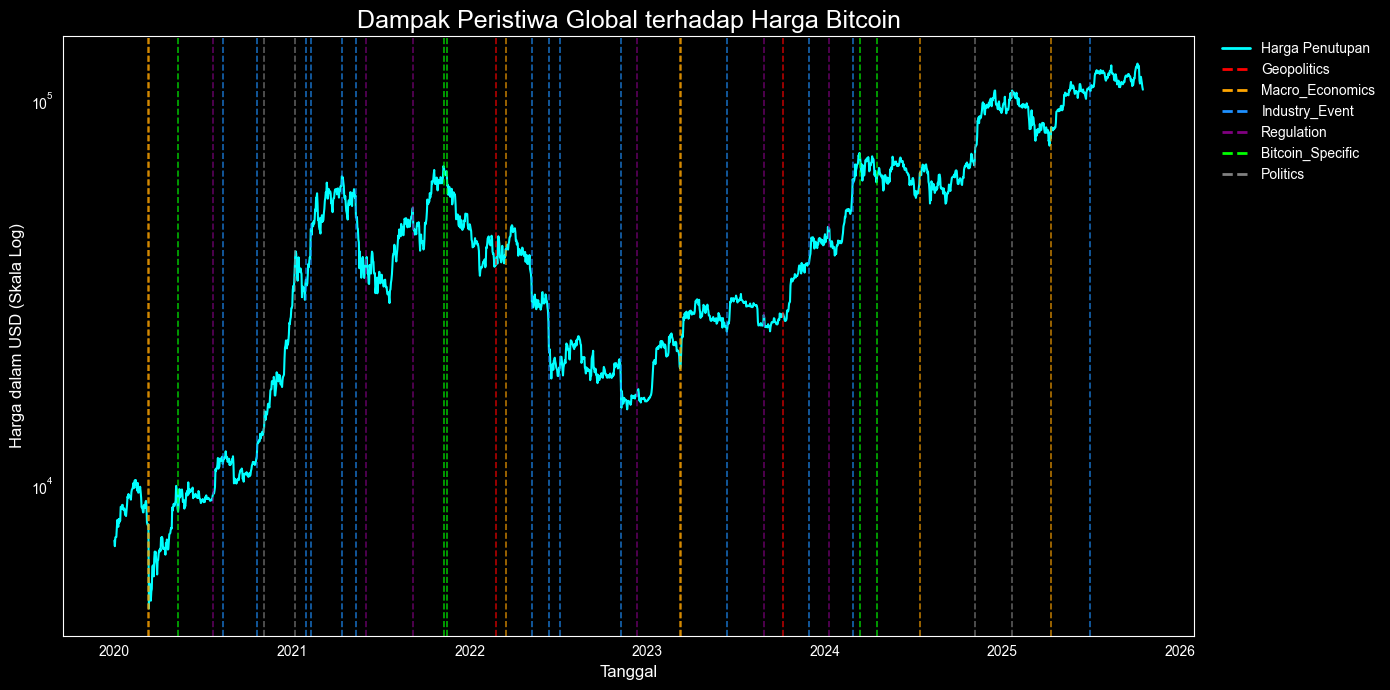

In [18]:
color_map = {
    'Geopolitics': 'red',
    'Macro_Economics': 'orange',
    'Industry_Event': 'dodgerblue',
    'Regulation': 'purple',
    'Bitcoin_Specific': 'lime',
    'Politics': 'grey'
}

plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['close'], label='Harga Penutupan', color='cyan', zorder=1)

for event in events:
    event_date = pd.to_datetime(event['date'])
    event_category = event['category']

    if event_date < df['timestamp'].min() or event_date > df['timestamp'].max():
        continue

    nearest_idx = (df['timestamp'] - event_date).abs().idxmin()
    actual_date = df.loc[nearest_idx, 'timestamp']

    plt.axvline(
        x=actual_date,
        color=color_map.get(event_category, 'white'),
        linestyle='--',
        alpha=0.7,
        linewidth=1.2,
        zorder=2
    )

legend_elements = [
    Line2D([0], [0], color=color, lw=2, linestyle='--', label=category)
    for category, color in color_map.items()
]
price_line = Line2D([0], [0], color='cyan', lw=2, label='Harga Penutupan')
plt.legend(handles=[price_line] + legend_elements,
            loc='upper left',
            bbox_to_anchor = (1.02, 1),
            borderaxespad = 0,
            frameon = False)

plt.title('Dampak Peristiwa Global terhadap Harga Bitcoin', fontsize=18)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga dalam USD (Skala Log)', fontsize=12)
plt.yscale('log')
plt.grid(False)
plt.tight_layout()
plt.show()


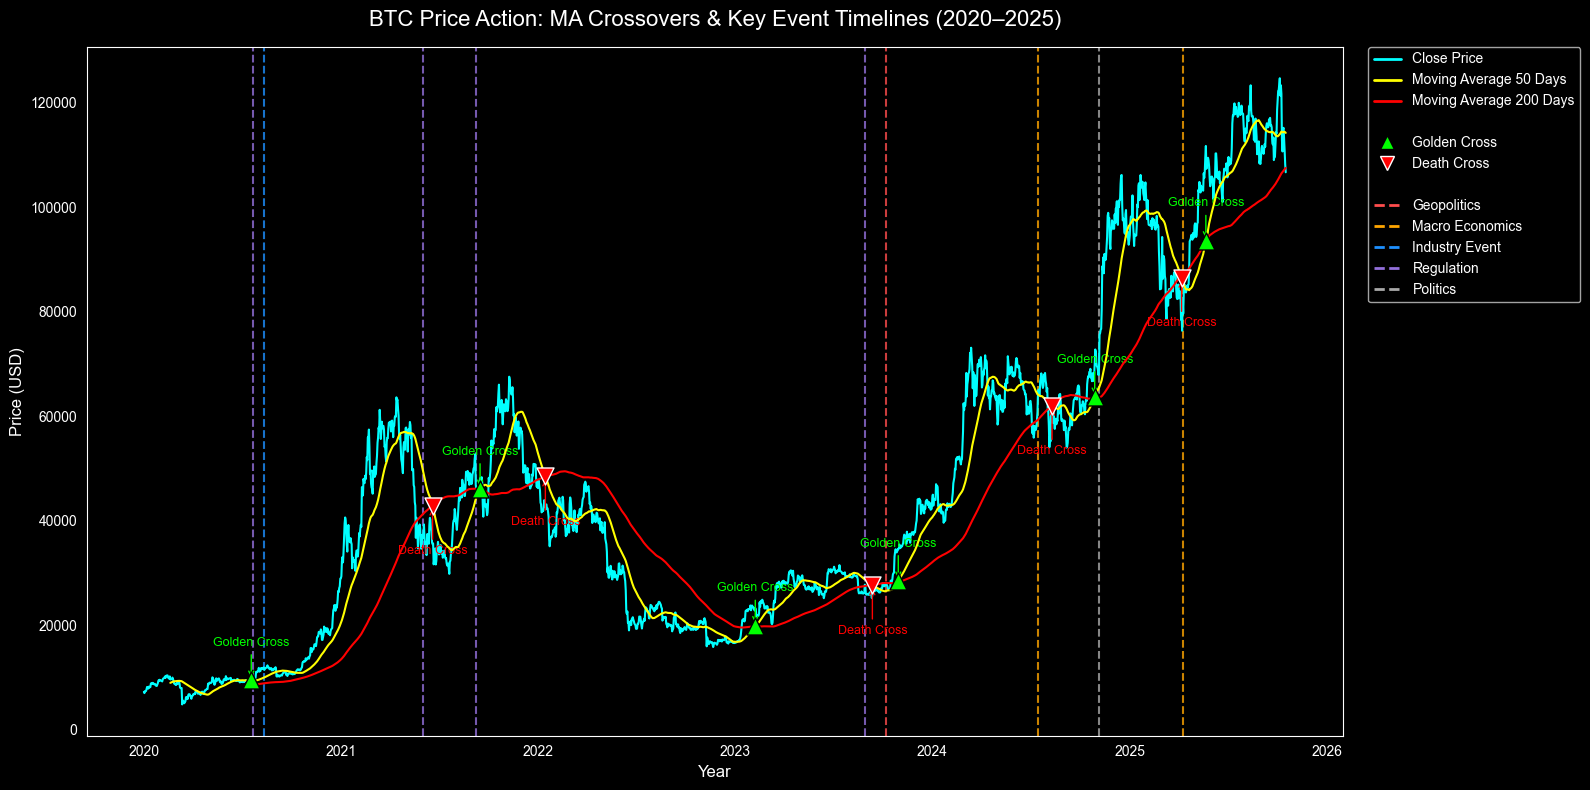

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df_chart['timestamp'], df_chart['close'], label='Harga Penutupan', color='cyan', zorder=3)
ax.plot(df_chart['timestamp'], df_chart['MA50'], label='MA 50 Hari', color='yellow', linewidth=1.5, zorder=4)
ax.plot(df_chart['timestamp'], df_chart['MA200'], label='MA 200 Hari', color='red', linewidth=1.5, zorder=4)

proximity_days = 30
proximity_window = pd.Timedelta(days=proximity_days)
cross_dates = pd.concat([golden_cross['timestamp'], death_cross['timestamp']])

color_map = {
    'Geopolitics': '#ff4d4d',
    'Macro_Economics': '#ffa500',
    'Industry_Event': '#1e90ff',
    'Regulation': '#9370db',
    'Bitcoin_Specific': '#32cd32',
    'Politics': '#a9a9a9'
}

plotted_categories = set()

for event in events:
    event_date = pd.to_datetime(event['date'])
    
    is_near_cross = (cross_dates - event_date).abs().le(proximity_window).any()

    if is_near_cross:
        category = event['category']
        
        ax.axvline(
            x=event_date,
            color=color_map.get(category, 'white'),
            linestyle='--',
            alpha=0.8,
            linewidth=1.5,
            zorder=2
        )
        
        plotted_categories.add(category)

ax.scatter(golden_cross['timestamp'], golden_cross['MA50'], label='Golden Cross', color='lime', marker='^', s=150, edgecolor='black', zorder=5)
ax.scatter(death_cross['timestamp'], death_cross['MA50'], label='Death Cross', color='red', marker='v', s=150, edgecolor='white', zorder=5)

for _, row in golden_cross.iterrows():
    ax.annotate('Golden Cross', xy=(row['timestamp'], row['MA50']), xytext=(0, 25), textcoords='offset points',
                ha='center', fontsize=9, color='lime', arrowprops=dict(arrowstyle='->', color='lime'))

for _, row in death_cross.iterrows():
    ax.annotate('Death Cross', xy=(row['timestamp'], row['MA50']), xytext=(0, -35), textcoords='offset points',
                ha='center', fontsize=9, color='red', arrowprops=dict(arrowstyle='->', color='red'))

legend_elements = [
    Line2D([0], [0], color='cyan', lw=2, label='Close Price'),
    Line2D([0], [0], color='yellow', lw=2, label='Moving Average 50 Days'),
    Line2D([0], [0], color='red', lw=2, label='Moving Average 200 Days'),
    Line2D([0], [0], color='none', label=''),
    Line2D([0], [0], marker='^', color='none', label='Golden Cross', markerfacecolor='lime', markeredgecolor='black', markersize=10),
    Line2D([0], [0], marker='v', color='none', label='Death Cross', markerfacecolor='red', markeredgecolor='white', markersize=10),
    Line2D([0], [0], color='none', label=''),
]

for category, color in color_map.items():
    if category in plotted_categories:
        legend_elements.append(
            Line2D([0], [0], color=color, lw=2, linestyle='--', label=category.replace('_', ' '))
        )

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(False)

plt.title('BTC Price Action: MA Crossovers & Key Event Timelines (2020–2025)', fontsize=16, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

plt.tight_layout()
plt.show()

=== Rata-rata Return Setelah Event ===
         event_type    ret_7d   ret_14d
0  Bitcoin_Specific -0.025704 -0.032534
1       Geopolitics  0.036908  0.059201
2    Industry_Event  0.003887  0.053512
3   Macro_Economics  0.106035  0.180988
4          Politics  0.092308  0.128274
5        Regulation -0.019698 -0.004920


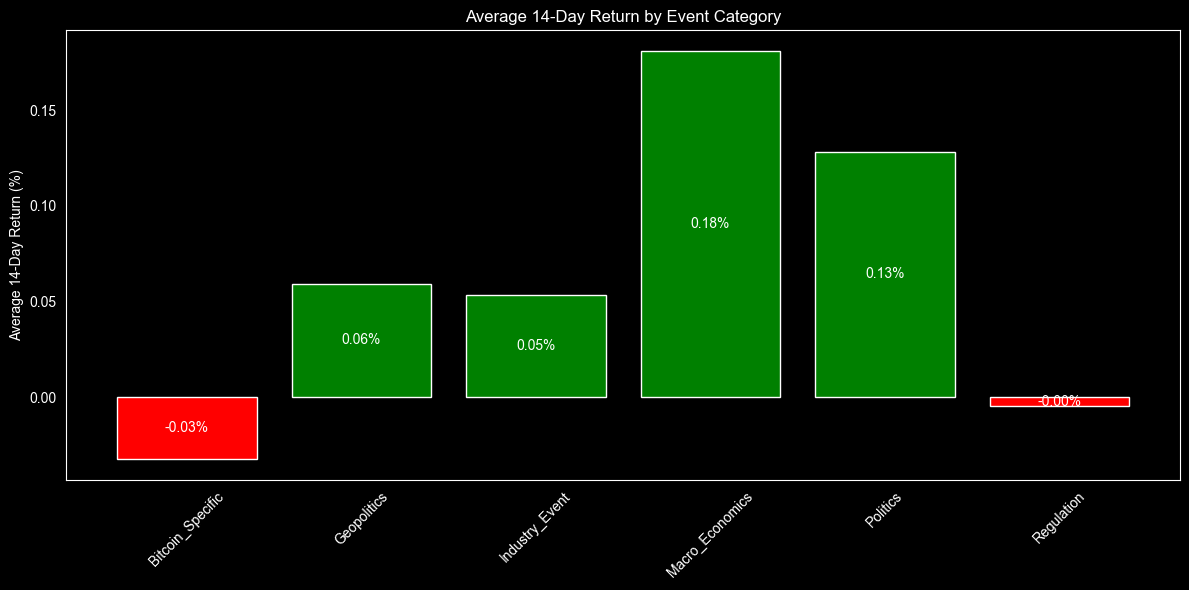

<Figure size 1200x600 with 0 Axes>

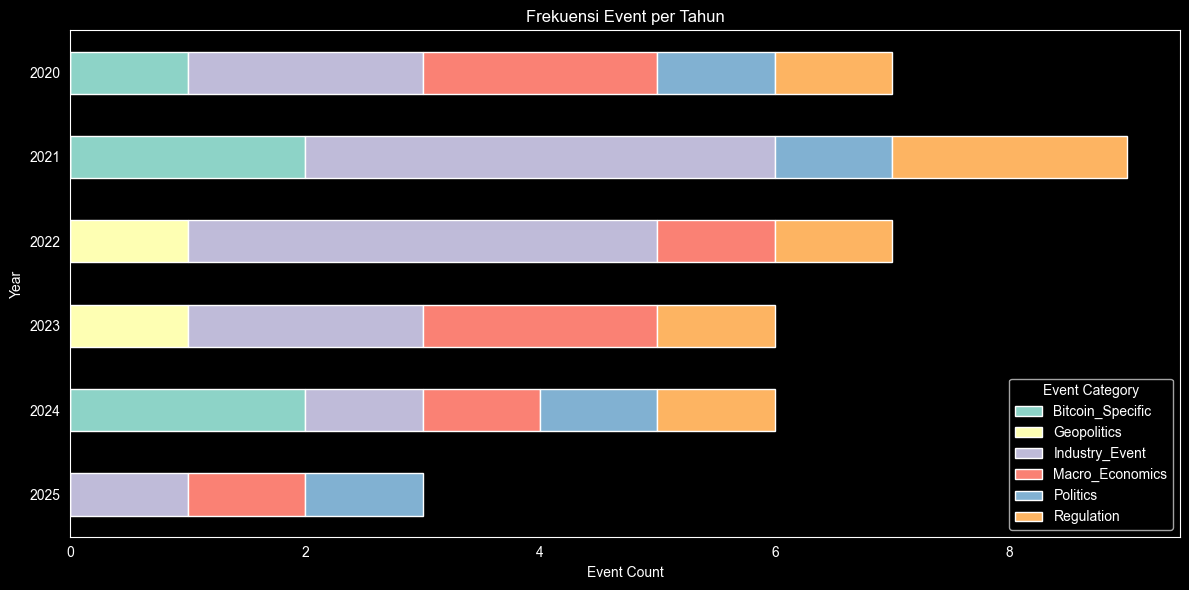

In [20]:
after_event_returns = []

# Daftar kategori event
event_cols = ['Bitcoin_Specific', 'Geopolitics', 'Industry_Event', 
              'Macro_Economics', 'Politics', 'Regulation']

for col in event_cols:
    for i in range(len(df)):
        if df.loc[i, col] == 1:
            # Ambil return 3 dan 7 hari setelah event
            ret_7d = df['return'].iloc[i+1:i+8].sum(skipna=True)
            ret_14d = df['return'].iloc[i+1:i+15].sum(skipna=True)
            
            after_event_returns.append({
                'event_type': col,
                'timestamp': df.loc[i, 'timestamp'],
                'ret_7d': ret_7d,
                'ret_14d': ret_14d
            })

after_event_df = pd.DataFrame(after_event_returns)

avg_returns = after_event_df.groupby('event_type')[['ret_7d', 'ret_14d']].mean().reset_index()

print("=== Rata-rata Return Setelah Event ===")
print(avg_returns)

colors = ['green' if val > 0 else 'red' for val in avg_returns['ret_14d']]

plt.figure(figsize=(12, 6))
ax = plt.gca()
bar = ax.bar(avg_returns['event_type'], avg_returns['ret_14d'], color = colors)
plt.title('Average 14-Day Return by Event Category')
plt.ylabel('Average 14-Day Return (%)')
plt.xticks(rotation=45)
plt.grid(False)
ax.bar_label(bar, fmt='%.2f%%', label_type= 'center')
plt.tight_layout()
plt.show()

event_freq = df.groupby('year')[event_cols].sum()
event_freq.sort_values('year', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
event_freq.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title('Frekuensi Event per Tahun')
plt.xlabel('Event Count')
plt.ylabel('Year')
plt.legend(title='Event Category')
plt.grid(False)
plt.tight_layout()
plt.show()


In [21]:
event_cols = ['Bitcoin_Specific', 'Geopolitics', 'Industry_Event', 
              'Macro_Economics', 'Politics', 'Regulation']

event_returns = []

for col in event_cols:
    event_rows = df[df[col] == 1] 
    for _, row in event_rows.iterrows():
        event_date = row['timestamp']
        
        ret_3d = df.loc[df['timestamp'] == event_date + pd.Timedelta(days=3), 'return']
        ret_7d = df.loc[df['timestamp'] == event_date + pd.Timedelta(days=7), 'return']
        
        if not ret_3d.empty and not ret_7d.empty:
            event_returns.append({
                'event_date': event_date,
                'event_type': col,
                'ret_3d': ret_3d.values[0],
                'ret_7d': ret_7d.values[0]
            })

event_returns = pd.DataFrame(event_returns)

event_returns.sort_values('event_date', ascending=True)

,event_date,event_type,ret_3d,ret_7d
21,2020-03-11,Macro_Economics,-0.072875,0.015134
22,2020-03-12,Macro_Economics,0.036589,0.142652
0,2020-05-11,Bitcoin_Specific,0.051841,0.005567
32,2020-07-22,Regulation,0.017050,0.017812
7,2020-08-11,Industry_Event,-0.001652,-0.027369
8,2020-10-21,Industry_Event,0.014599,-0.027117
28,2020-11-03,Politics,-0.000648,-0.002035
29,2021-01-06,Politics,-0.012187,0.097504
9,2021-01-29,Industry_Event,0.013096,0.036646
10,2021-02-08,Industry_Event,0.070567,-0.013724


In [22]:
event_summary = event_returns.groupby('event_type')[['ret_3d','ret_7d']].agg(['mean','std','count']).round(4)
event_summary


ret_3d                ret_7d              
                    mean     std count    mean     std count
event_type                                                  
Bitcoin_Specific  0.0150  0.0445     5 -0.0152  0.0215     5
Geopolitics      -0.0217  0.0205     2 -0.0166  0.0229     2
Industry_Event   -0.0049  0.0418    14 -0.0122  0.0473    14
Macro_Economics   0.0051  0.0523     7  0.0439  0.0551     7
Politics         -0.0006  0.0087     4  0.0206  0.0513     4
Regulation       -0.0178  0.0281     6  0.0056  0.0240     6

In [23]:
big_moves = df[(df['return'] > 0.1) | (df['return'] < -0.1)]
print(big_moves[['timestamp', 'close', 'return', 'volume']])

      timestamp     close    return     volume
71   2020-03-12   4800.00 -0.395048  261505.61
72   2020-03-13   5578.60  0.162208  402201.67
78   2020-03-19   6162.37  0.142652  199020.87
82   2020-03-23   6467.31  0.111950  164674.22
119  2020-04-29   8778.57  0.134332  183546.89
208  2020-07-27  11029.96  0.110599  150188.93
246  2020-09-03  10140.85 -0.109557  121950.11
309  2020-11-05  15590.02  0.102235  143741.52
386  2021-01-21  30850.13 -0.130204  135004.08
404  2021-02-08  46374.87  0.195361  138597.54
481  2021-04-26  54001.39  0.100569   86310.80
497  2021-05-12  49631.32 -0.124205   99842.79
504  2021-05-19  36690.09 -0.143751  354347.24
505  2021-05-20  40526.64  0.104566  203017.60
509  2021-05-24  38796.29  0.119492  161630.89
525  2021-06-09  37388.05  0.120046  136607.60
537  2021-06-21  31608.93 -0.112113  168778.87
615  2021-09-07  46863.73 -0.110136  123048.80
751  2022-01-21  36445.31 -0.104118   88860.89
765  2022-02-04  41574.25  0.114244   64703.96
789  2022-02-

In [24]:
from statsmodels.tsa.stattools import grangercausalitytests

# pastikan data tidak ada NaN
df_test = df[['return', 'volume']].dropna()

grangercausalitytests(df_test, maxlag=7)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5638  , p=0.4528  , df_denom=2112, df_num=1
ssr based chi2 test:   chi2=0.5646  , p=0.4524  , df=1
likelihood ratio test: chi2=0.5645  , p=0.4525  , df=1
parameter F test:         F=0.5638  , p=0.4528  , df_denom=2112, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3092  , p=0.7340  , df_denom=2109, df_num=2
ssr based chi2 test:   chi2=0.6199  , p=0.7335  , df=2
likelihood ratio test: chi2=0.6198  , p=0.7335  , df=2
parameter F test:         F=0.3092  , p=0.7340  , df_denom=2109, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2122  , p=0.8880  , df_denom=2106, df_num=3
ssr based chi2 test:   chi2=0.6388  , p=0.8875  , df=3
likelihood ratio test: chi2=0.6387  , p=0.8875  , df=3
parameter F test:         F=0.2122  , p=0.8880  , df_denom=2106, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6908  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(0.5637539847599986),
    np.float64(0.4528352922050666),
    np.float64(2112.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.564554771670169),
    np.float64(0.45243085508340175),
    np.int64(1)),
   'lrtest': (np.float64(0.5644794370637101),
    np.float64(0.45246101865095445),
    np.int64(1)),
   'params_ftest': (np.float64(0.5637539847590523),
    np.float64(0.4528352922054426),
    np.float64(2112.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.3092296185670969),
    np.float64(0.7340454825178147),
    np.float64(2109.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(0.6199254752497324),
    np.float64(0.7334742867091091),
    np.int64(2)),
   'lrtest': (np.float64(0.6198345971788513),
    np.float64(0.7335076158304334),
    np.int64(2)),
   'params_ftest': (np.float64(0.3092296187190128),
    np.float64(0.7340454824064078),
    np.float64(2109.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
 

In [25]:
def create_df_year(df, target_year):
    return df[df['year'] == target_year]

df_2020 = create_df_year(df, 2020)
df_2021 = create_df_year(df, 2021)
df_2022 = create_df_year(df, 2022)
df_2023 = create_df_year(df, 2023)
df_2024 = create_df_year(df, 2024)
df_2025 = create_df_year(df, 2025)

In [26]:
data = [df_2020, df_2021, df_2022, df_2023, df_2024, df_2025]
tahun = [2020, 2021, 2022, 2023, 2024, 2025]

for d, t in zip(data, tahun):
    fig = go.Figure(data=[go.Candlestick(x=d.index,
                    open=d['open'],
                    high=d['high'],
                    low=d['low'],
                    close=d['close'])])
    fig.update_layout(
        title=f'Pergerakan Harga Bitcoin Tahun {t}',
        yaxis_title='Harga (USD)',
        xaxis_title='Tanggal',
        template='plotly_dark',
        xaxis_rangeslider_visible=False
    )
    fig.show()
